In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv(r"C:\Users\mochw\Downloads\Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,POINT (-122.53756 47.23165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10


In [29]:
# Checking for missng data
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [30]:
# Checking the null items
df[df['County'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
190021,WBAJA9C50K,NaN,NaN,AE,NaN,2019,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,53400.0,NaN,244582593,NaN,NaN,NaN
207034,5YJ3E1EB2M,NaN,NaN,NS,NaN,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,NaN,179569743,NaN,NaN,NaN
214205,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,159850029,NaN,NaN,NaN


In [31]:
# Removing null values
df['Legislative District'] = df['Legislative District'].fillna(0)
df = df.dropna()

In [32]:
# Deleting duplicate items
df = df.drop_duplicates()

In [33]:
# Checking the data type
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [34]:
# Rename column
df = df.rename(columns={'County':'Country', 'Make':'Brand'})

In [35]:
df['Electric Utility'] = df['Electric Utility'].replace(r'.*BONNEVILLE.*', 'BONNEVILLE POWER ADMINISTRATION', regex=True)
df['Electric Utility'] = df['Electric Utility'].replace(r'.*PUGET SOUND ENERGY INC.*', 'PUGET SOUND ENERGY INC', regex=True)
df['Electric Utility'] = df['Electric Utility'].replace(r' - .*', '', regex=True)

In [36]:
# Replace values in 'Electric Vehicle Type' column
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].replace({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})

In [37]:
df

,VIN (1-10),Country,City,State,Postal Code,Model Year,Brand,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,PHEV,Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,BEV,Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,BEV,Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE,5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE,5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,BEV,Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC,5.305307e+10
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,BEV,Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,POINT (-122.53756 47.23165),BONNEVILLE POWER ADMINISTRATION,5.305307e+10
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,BEV,Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC,5.305307e+10


In [38]:
# Removing uneeded column
df = df.drop(columns=['VIN (1-10)', 'Vehicle Location', 'Postal Code', '2020 Census Tract', 'Electric Range', 'Base MSRP', 'DOL Vehicle ID', 'Legislative District'])
df.head()

,Country,City,State,Model Year,Brand,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,Kitsap,Poulsbo,WA,2023,JEEP,WRANGLER,PHEV,Not eligible due to low battery range,PUGET SOUND ENERGY INC
1,Snohomish,Lake Stevens,WA,2019,CHEVROLET,BOLT EV,BEV,Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
2,King,Seattle,WA,2015,BMW,I3,BEV,Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE
3,King,Seattle,WA,2019,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE
4,Yakima,Selah,WA,2015,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,PACIFICORP


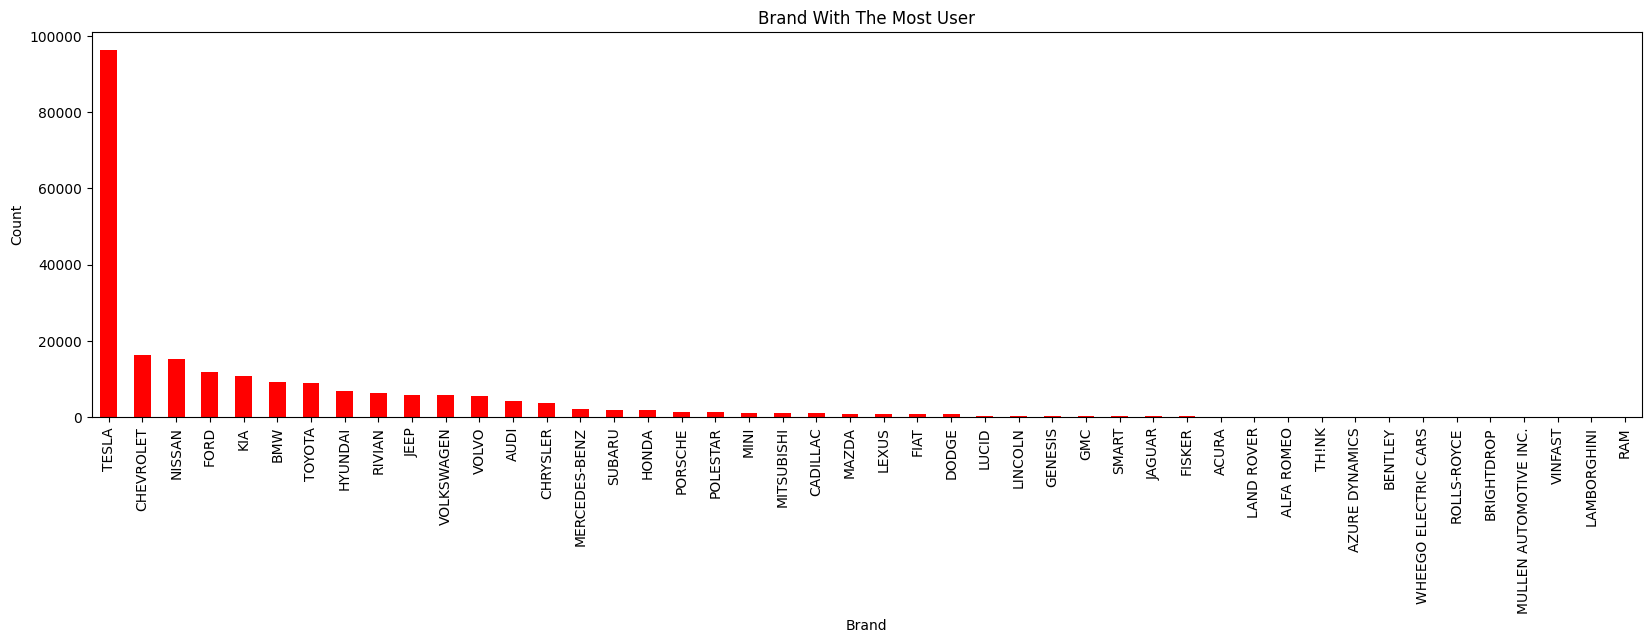

In [39]:
# Count the occurrences of each make
brand_counts = df['Brand'].value_counts()
# Plot the bar chart
brand_counts.plot(kind='bar', figsize=(20, 5), title='Brand With The Most User', color='red')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [40]:
# Most use electric car 
brand_counts_df = brand_counts.reset_index()
brand_counts_df.columns = ['Brand', 'Count']
brand_counts_df

,Brand,Count
0,TESLA,96177
1,CHEVROLET,16403
2,NISSAN,15259
3,FORD,11930
4,KIA,10759
5,BMW,9170
6,TOYOTA,8955
7,HYUNDAI,6877
8,RIVIAN,6236
9,JEEP,5772


In [41]:
country_counts = df['Country'].value_counts()
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Country', 'Count']
country_counts_df

,Country,Count
0,King,113154
1,Snohomish,27184
2,Pierce,18026
3,Clark,13452
4,Thurston,8252
...,...,...
202,Marion,1
203,Pettis,1
204,Norfolk,1
205,Hudson,1


In [42]:
state_counts = df['State'].value_counts()
state_counts_df = state_counts.reset_index()
state_counts_df.columns = ['State', 'Count']
state_counts_df

,State,Count
0,WA,223496
1,CA,114
2,VA,59
3,MD,39
4,TX,30
5,NC,19
6,CO,17
7,FL,15
8,GA,15
9,IL,11


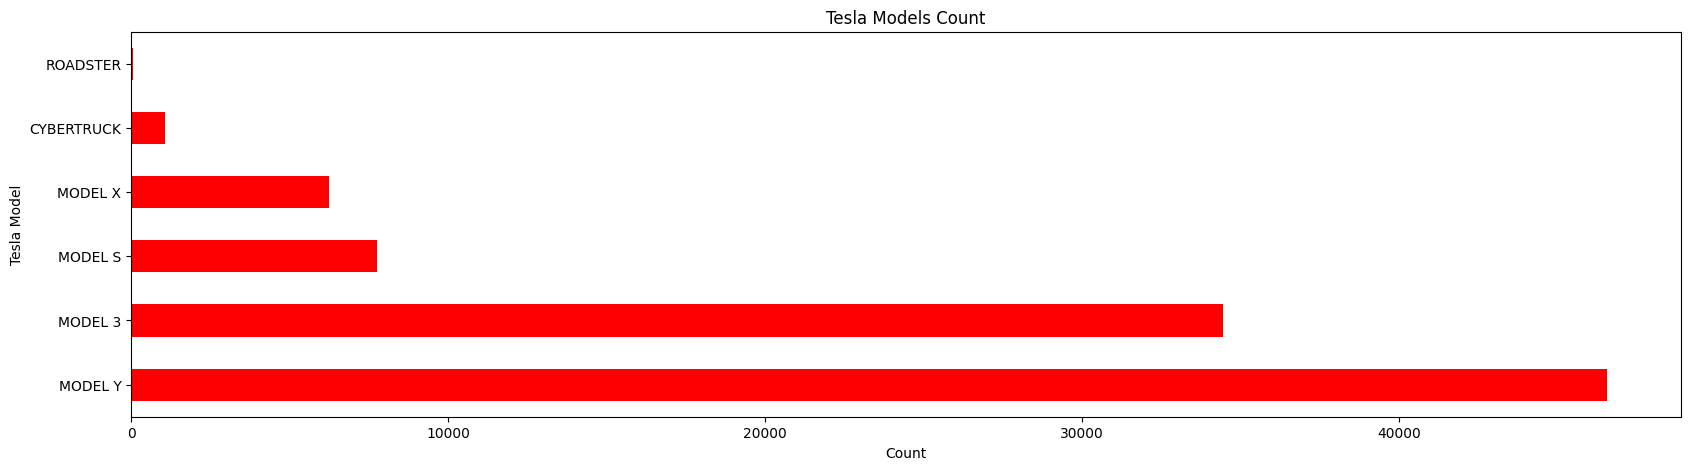

In [43]:
tesla_df = df[df['Brand'] == 'TESLA']
tesla_model_counts = tesla_df['Model'].value_counts()
tesla_model_counts.plot(kind='barh', figsize=(20, 5), title='Tesla Models Count', color='Red')
plt.xlabel('Count')
plt.ylabel('Tesla Model')
plt.show()

In [44]:
type_counts = df['Electric Vehicle Type'].value_counts()
type_counts_df = type_counts.reset_index()
type_counts_df.columns = ['Type', 'Count']
type_counts_df



,Type,Count
0,BEV,177145
1,PHEV,46822


<Axes: title={'center': 'Count by Type'}, ylabel='Count'>

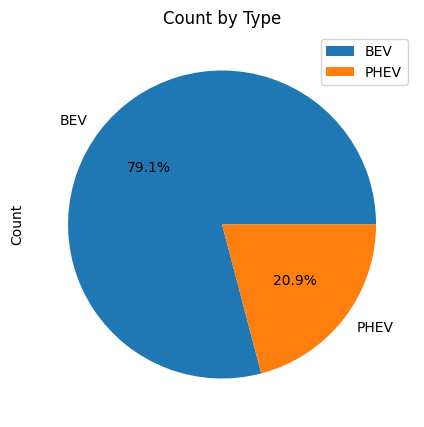

In [45]:
type_counts_df.set_index('Type').plot(kind='pie', y='Count', figsize=(10, 5), autopct='%1.1f%%', title="Count by Type")

In [46]:
utility_count = df['Electric Utility'].value_counts()
utility_count_df = utility_count.reset_index()
utility_count_df.columns = ['Electric Utility', 'Count']
utility_count_df

,Electric Utility,Count
0,PUGET SOUND ENERGY INC,132637
1,BONNEVILLE POWER ADMINISTRATION,44727
2,CITY OF SEATTLE,38193
3,PACIFICORP,1838
4,MODERN ELECTRIC WATER COMPANY,1528
5,PUD NO 1 OF CHELAN COUNTY,1355
6,PUD NO 2 OF GRANT COUNTY,822
7,AVISTA CORP,514
8,PUD NO 1 OF DOUGLAS COUNTY,489
9,NON WASHINGTON STATE ELECTRIC UTILITY,471


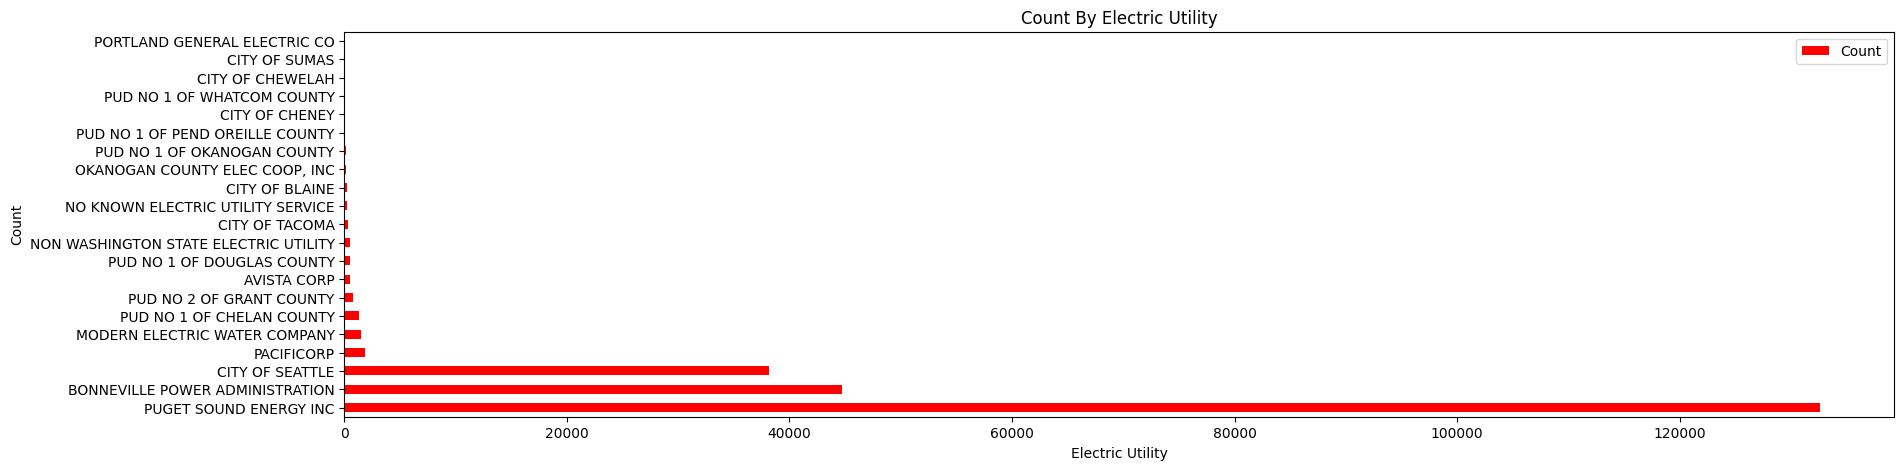

In [47]:
utility_count_df.set_index('Electric Utility').plot(kind='barh', figsize=(20,5), color='red', title='Count By Electric Utility')
plt.xlabel('Electric Utility')
plt.ylabel('Count')
plt.show()